# TODO:
- DataTransformer
    - is_test=False - is it needed?

# Imports

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Constants

# Sample (get) data

In [21]:
train_df = pd.read_csv('train_data.csv')

# Explore (visualize) data

In [22]:
train_df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  4124 non-null   int64  
 1   YearBuilt                  4124 non-null   int64  
 2   Size(sqf)                  4124 non-null   int64  
 3   Floor                      4124 non-null   int64  
 4   HallwayType                4124 non-null   object 
 5   HeatingType                4124 non-null   object 
 6   AptManageType              4124 non-null   object 
 7   N_Parkinglot(Ground)       4124 non-null   float64
 8   N_Parkinglot(Basement)     4124 non-null   float64
 9   TimeToBusStop              4124 non-null   object 
 10  TimeToSubway               4124 non-null   object 
 11  N_manager                  4124 non-null   float64
 12  N_elevators                4124 non-null   float64
 13  SubwayStation              4124 non-null   objec

In [24]:
train_df.nunique()

SalePrice                    841
YearBuilt                     16
Size(sqf)                     89
Floor                         43
HallwayType                    3
HeatingType                    2
AptManageType                  2
N_Parkinglot(Ground)          23
N_Parkinglot(Basement)        20
TimeToBusStop                  3
TimeToSubway                   5
N_manager                      9
N_elevators                   13
SubwayStation                  8
N_FacilitiesInApt              9
N_FacilitiesNearBy(Total)     11
N_SchoolNearBy(Total)         14
dtype: int64

In [25]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,4124.0,222177.477207,106325.535526,34070.0,144752.0,209588.0,291570.0,585840.0
YearBuilt,4124.0,2002.977934,8.765838,1978.0,1993.0,2006.0,2007.0,2015.0
Size(sqf),4124.0,959.958778,384.548456,135.0,644.0,910.0,1160.0,2337.0
Floor,4124.0,11.994665,7.581330,1.0,6.0,11.0,17.0,43.0
N_Parkinglot(Ground),4124.0,192.789040,215.455916,0.0,11.0,100.0,249.0,713.0
N_Parkinglot(Basement),4124.0,572.857662,408.179957,0.0,184.0,536.0,798.0,1321.0
N_manager,4124.0,6.313773,3.224556,1.0,5.0,6.0,8.0,14.0
N_elevators,4124.0,11.055771,7.717030,0.0,5.0,11.0,16.0,27.0
N_FacilitiesInApt,4124.0,5.824200,2.344331,1.0,4.0,5.0,7.0,10.0
N_FacilitiesNearBy(Total),4124.0,9.860330,3.444848,0.0,8.0,9.0,13.0,16.0


array([[<AxesSubplot: title={'center': 'SalePrice'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'Size(sqf)'}>],
       [<AxesSubplot: title={'center': 'Floor'}>,
        <AxesSubplot: title={'center': 'N_Parkinglot(Ground)'}>,
        <AxesSubplot: title={'center': 'N_Parkinglot(Basement)'}>],
       [<AxesSubplot: title={'center': 'N_manager'}>,
        <AxesSubplot: title={'center': 'N_elevators'}>,
        <AxesSubplot: title={'center': 'N_FacilitiesInApt'}>],
       [<AxesSubplot: title={'center': 'N_FacilitiesNearBy(Total)'}>,
        <AxesSubplot: title={'center': 'N_SchoolNearBy(Total)'}>,
        <AxesSubplot: >]], dtype=object)

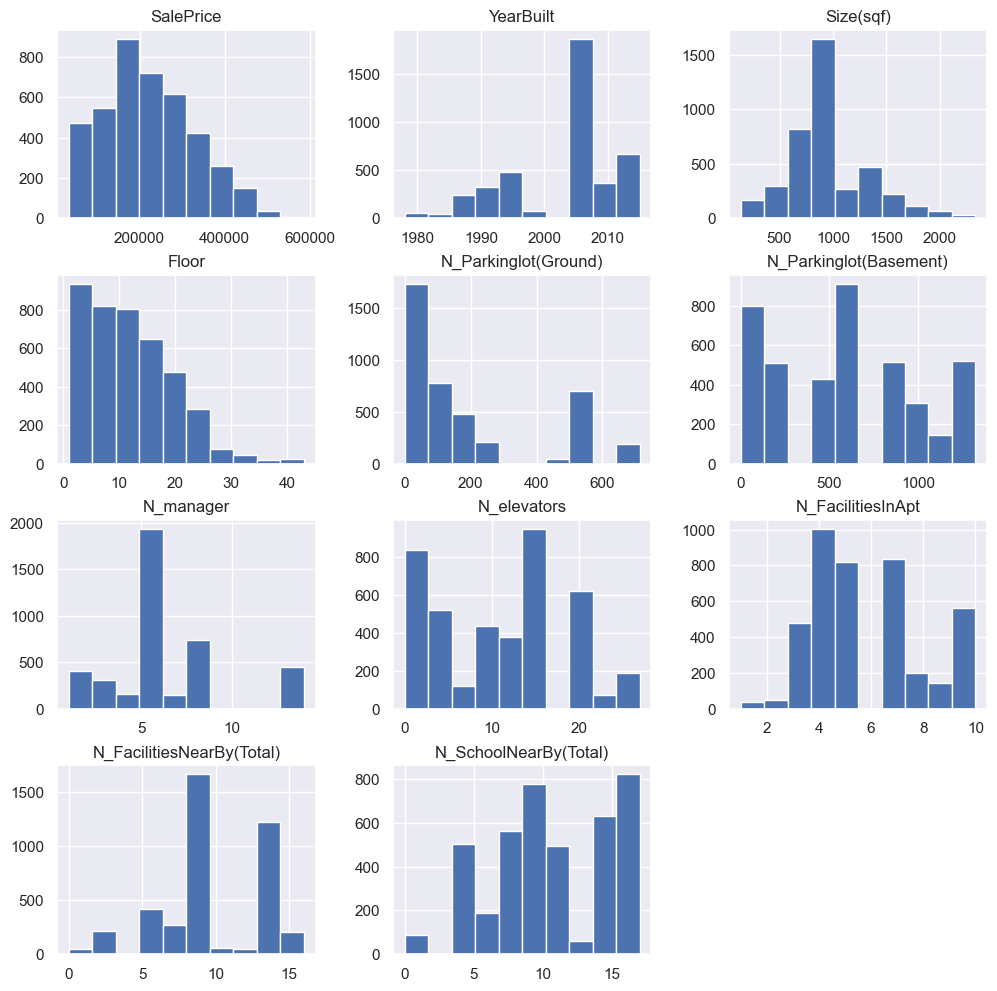

In [26]:
sns.set(rc={'figure.figsize':(12, 12)})  # set figsize
train_df.hist()

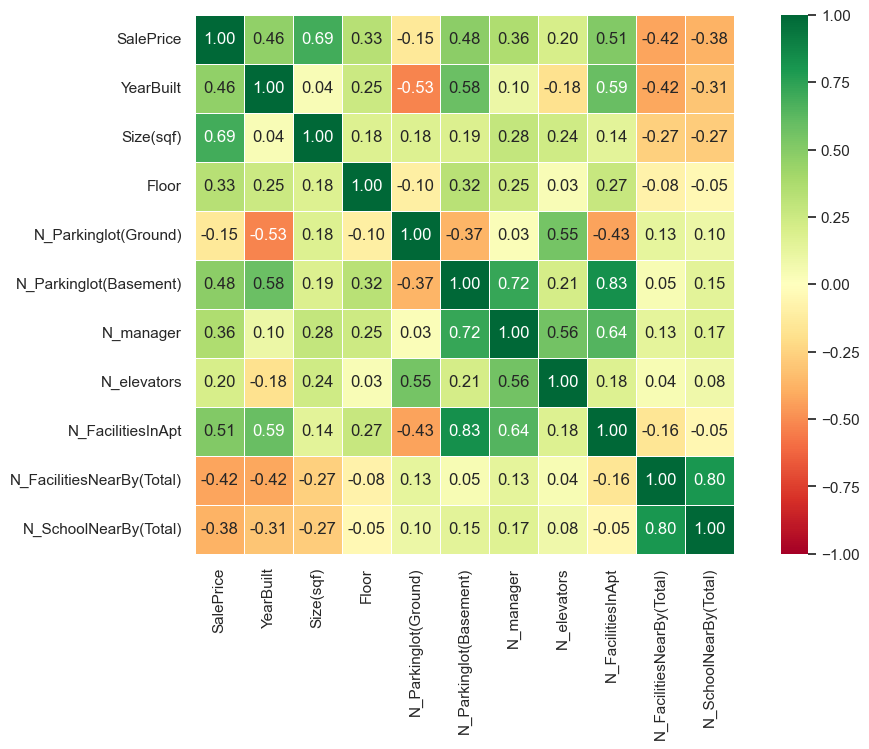

In [27]:
sns.set(rc={'figure.figsize':(12, 7)})  # set figsize
heatmap = sns.heatmap(train_df.corr(numeric_only=True), square=True, cmap='RdYlGn', annot=True, fmt=".2f", linewidth=0.5, vmin=-1, vmax=1)

# Modify data (using pipeline)

In [28]:
# from datatransformer import DataTransformer

# train_df = DataTransformer.transform(train_df, is_test=False) # if is_test=True then transform one column less

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_pipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

## One-hot encoding

## Select features

# Model training

# Assess (evaluate the performance of trained models)